In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [2]:
fdata = pd.read_csv('Multiclass Diabetes Dataset.csv')

In [3]:
fdata

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,30.0,2
260,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6,2
261,1,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,2
262,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,2


In [4]:
fdata.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'Class'],
      dtype='object')

In [5]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [6]:
fdata.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [7]:
fdata.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

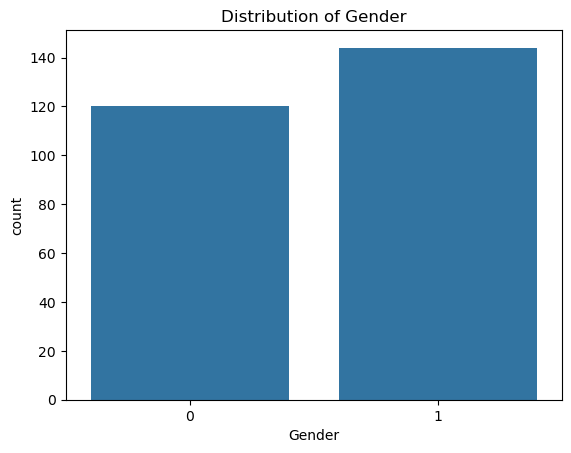

In [8]:
sns.countplot(x='Gender', data=fdata)
plt.title("Distribution of Gender")
plt.show()

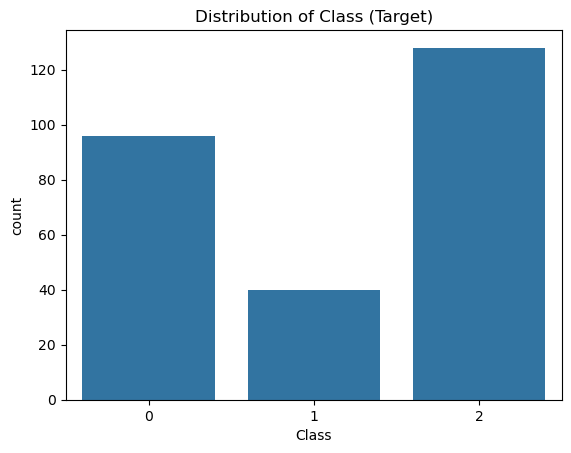

In [9]:
sns.countplot(x='Class', data=fdata)
plt.title("Distribution of Class (Target)")
plt.show()

In [10]:
fdata['Cr']=fdata['Cr']/88.4

In [11]:
fdata['Chol']=fdata['Chol']*38.7
fdata['TG']=fdata['TG']*88.5
fdata['HDL']=fdata['HDL']*38.7
fdata['LDL']=fdata['LDL']*38.7

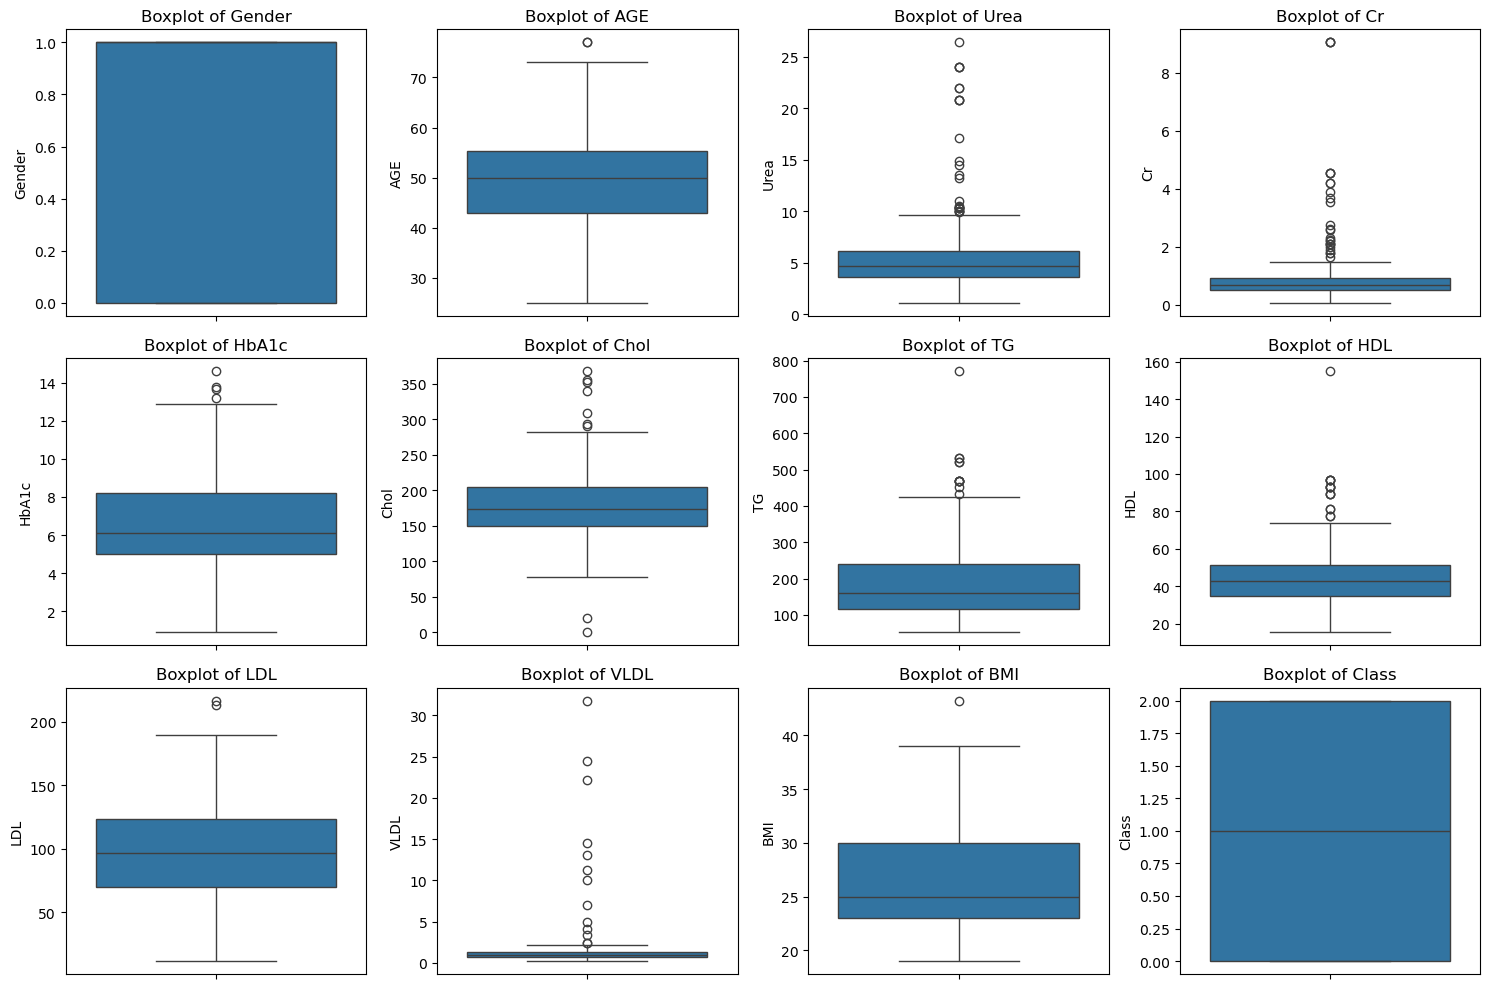

In [12]:
numdata=fdata.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numdata):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=fdata[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

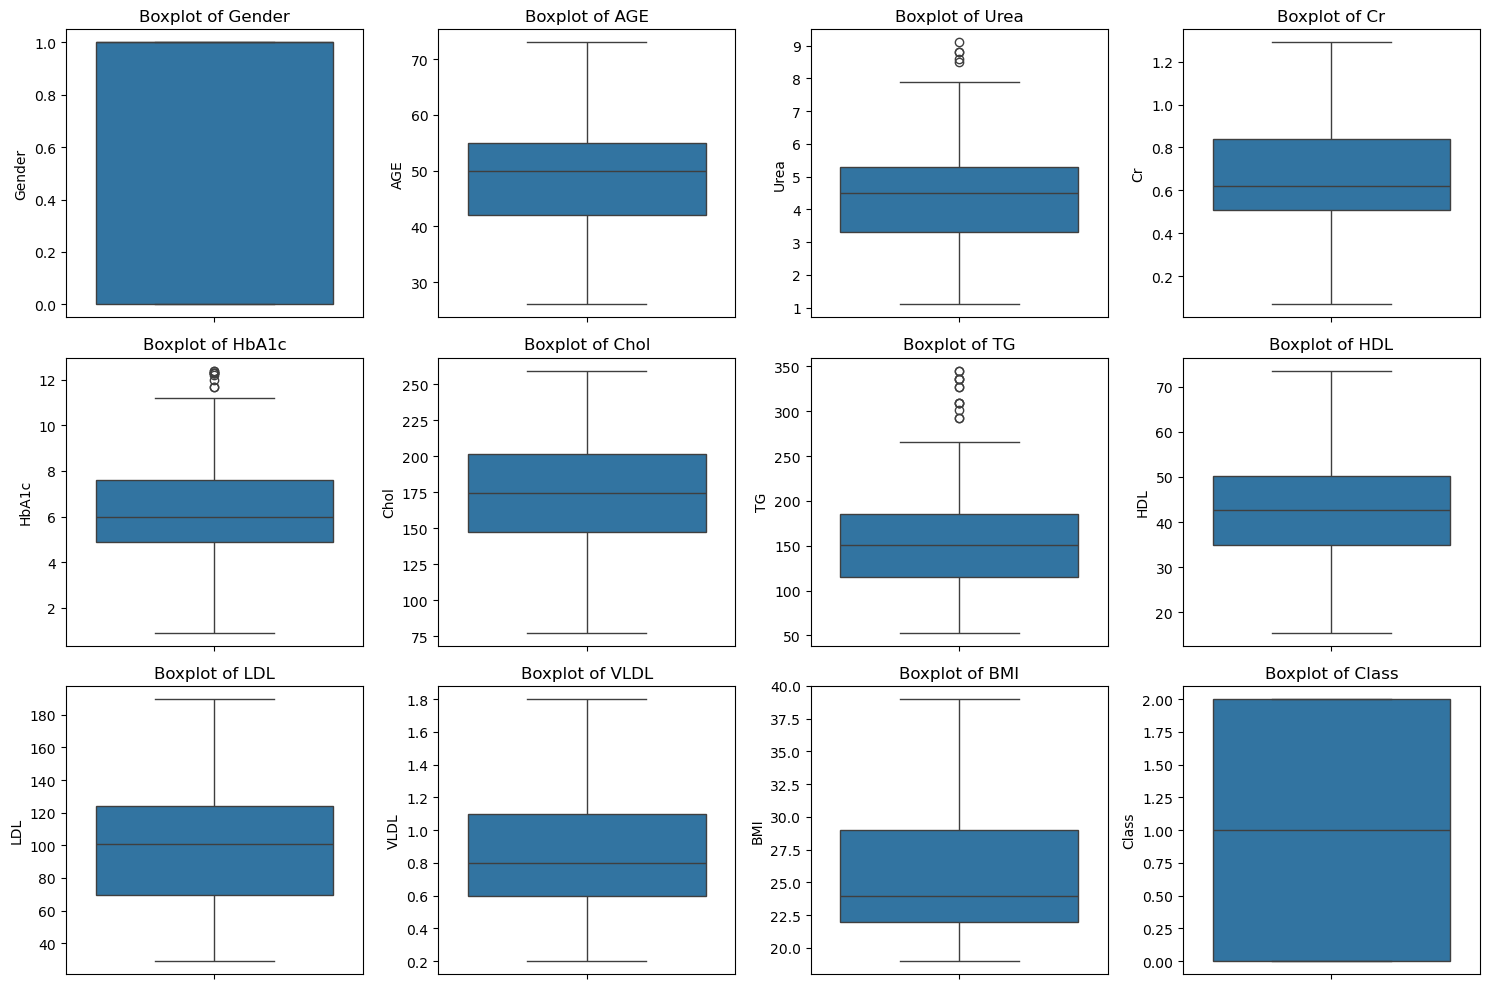

In [13]:
def remove_outliers_iqr(fdata):
    df_clean = fdata.copy()
    for col in df_clean.select_dtypes(include='number').columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean
df_clean = remove_outliers_iqr(fdata)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_clean.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df_clean[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

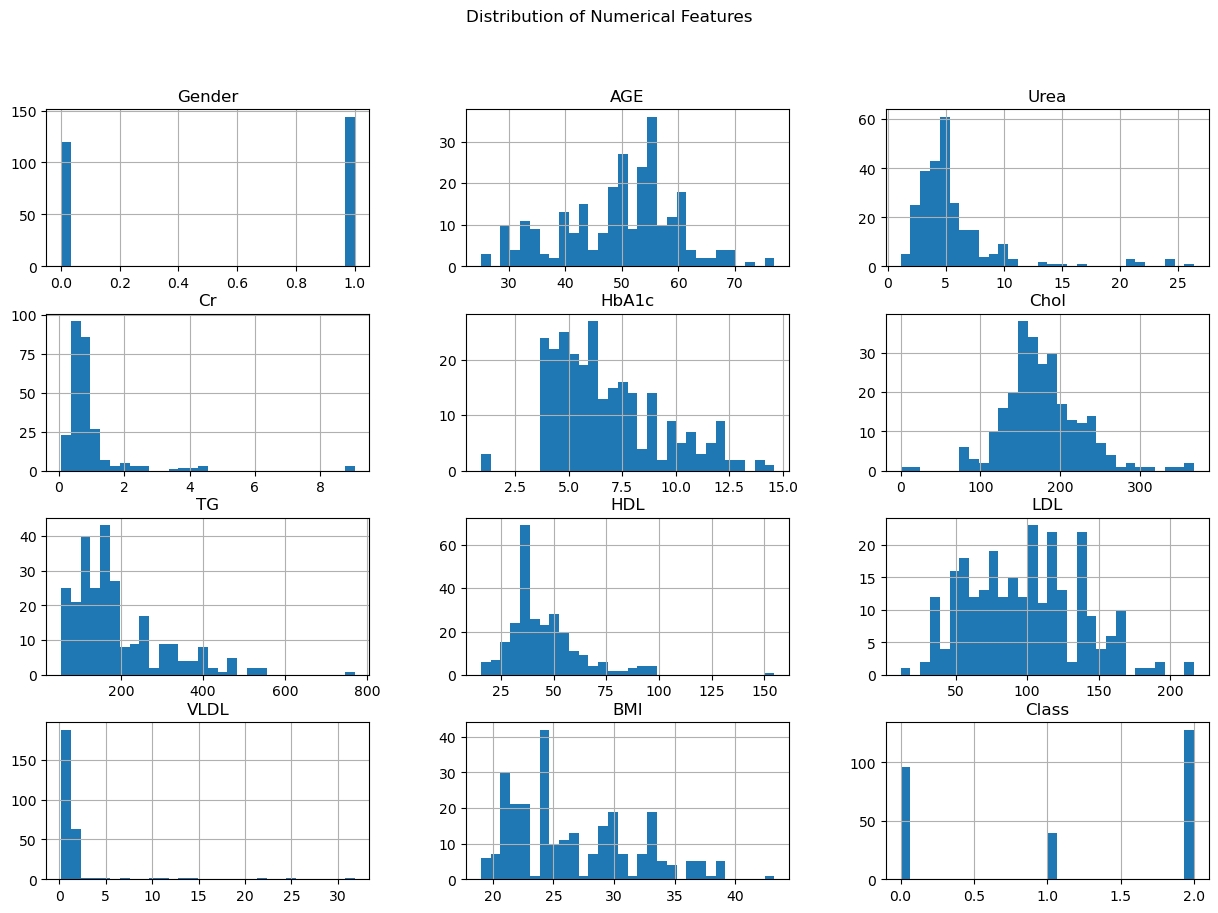

In [14]:
numdata=fdata.columns
fdata[numdata].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

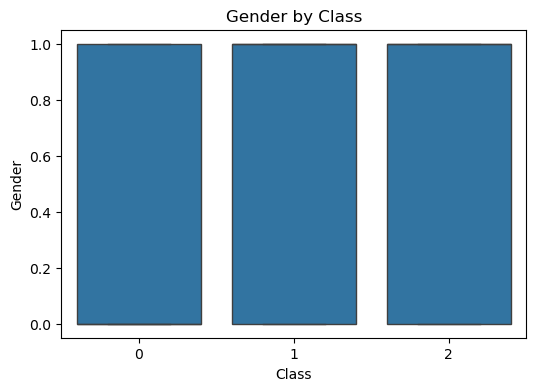

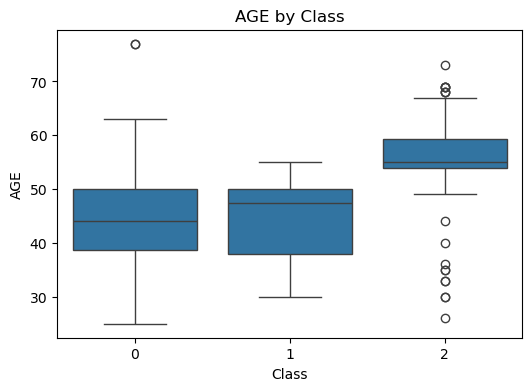

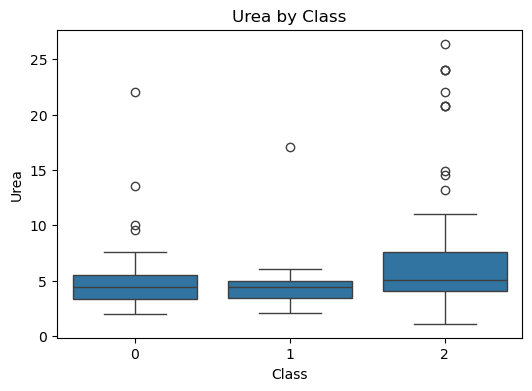

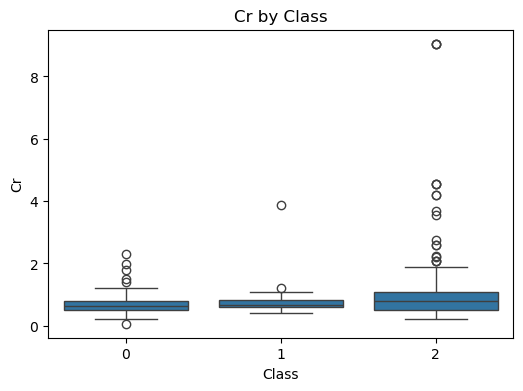

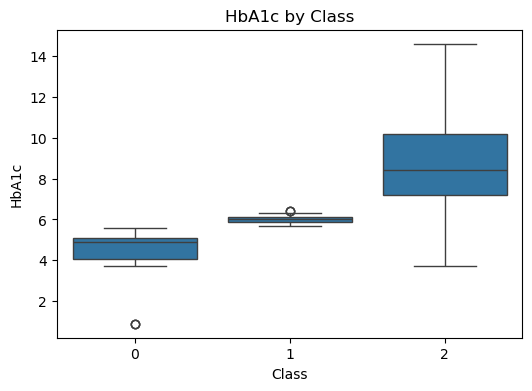

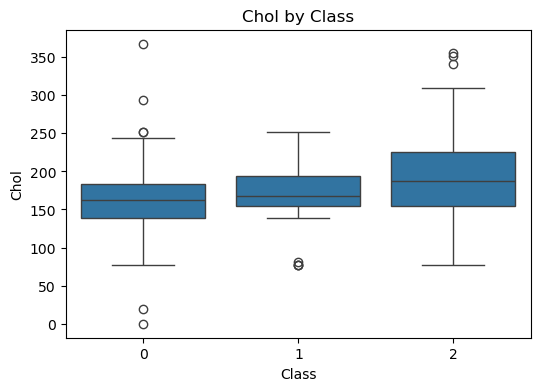

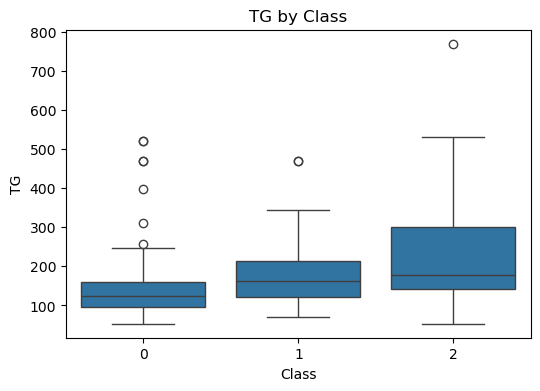

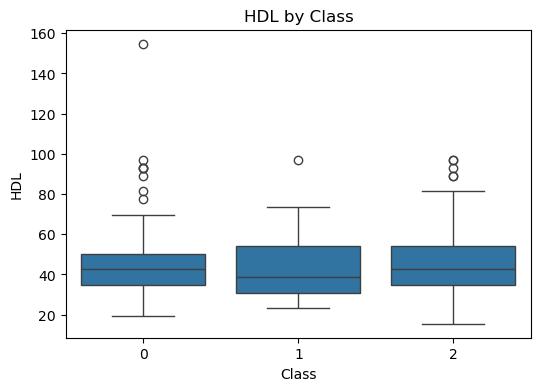

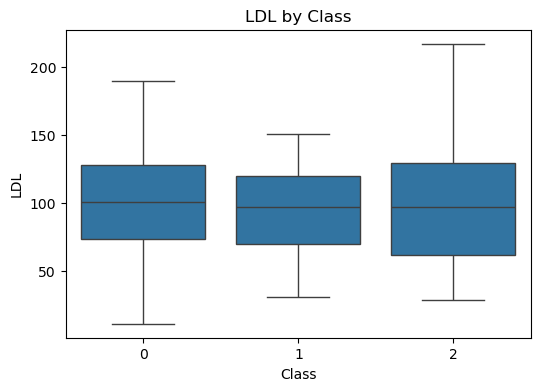

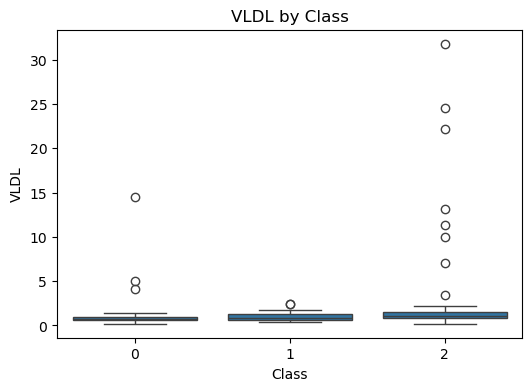

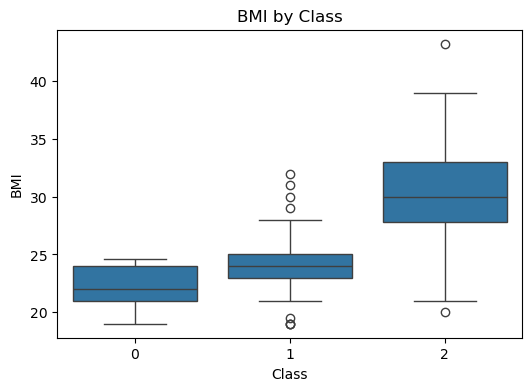

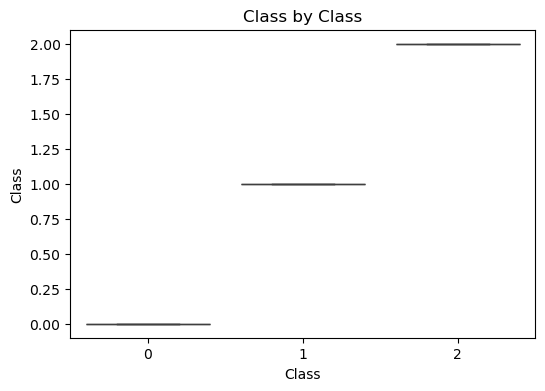

In [15]:
for col in numdata:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=col, data=fdata)
    plt.title(f"{col} by Class")
    plt.show()

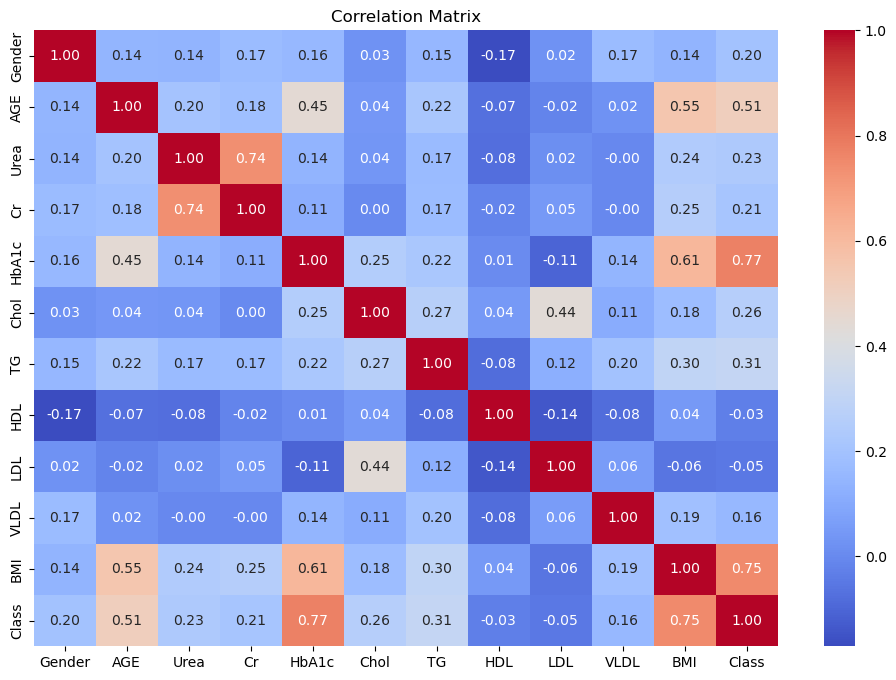

In [16]:
plt.figure(figsize=(12, 8))
corr = fdata.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

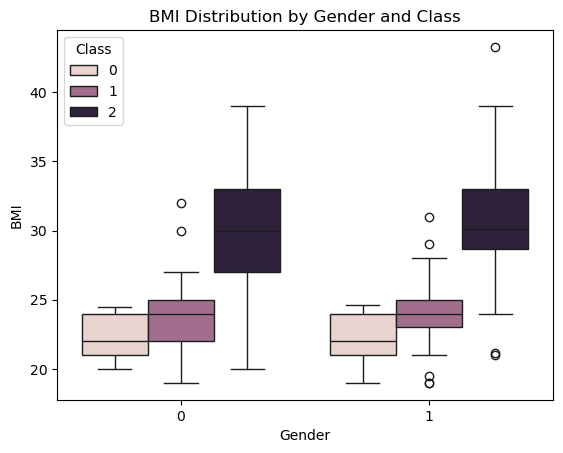

In [17]:
sns.boxplot(x='Gender', y='BMI', hue='Class', data=fdata)
plt.title("BMI Distribution by Gender and Class")
plt.show()

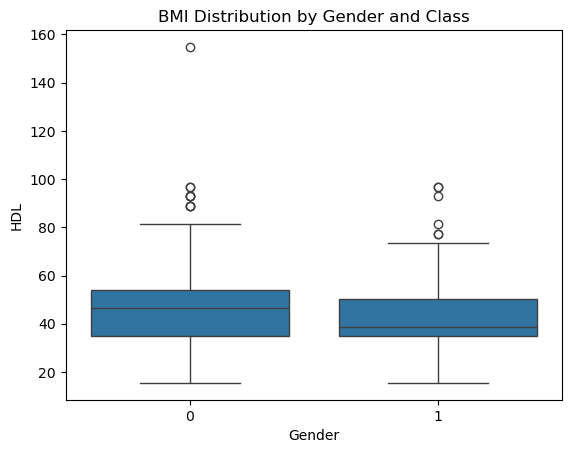

In [18]:
sns.boxplot(x='Gender', y='HDL', data=fdata)
plt.title("BMI Distribution by Gender and Class")
plt.show()

In [19]:
x=fdata.drop('Class',axis=1)
x

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,0.520362,4.9,162.54,79.65,92.88,54.18,0.5,24.0
1,1,26,4.5,0.701357,4.9,143.19,123.90,42.57,81.27,0.6,23.0
2,1,33,7.1,0.520362,4.9,189.63,88.50,30.96,77.40,0.4,21.0
3,0,45,2.3,0.271493,4.0,112.23,88.50,38.70,58.05,0.4,21.0
4,0,50,2.0,0.565611,4.0,139.32,115.05,34.83,81.27,0.6,24.0
...,...,...,...,...,...,...,...,...,...,...,...
259,0,61,24.0,4.536199,7.0,166.41,256.65,15.48,104.49,1.3,30.0
260,0,61,24.0,4.536199,7.0,166.41,256.65,15.48,104.49,1.3,36.6
261,1,60,20.8,9.049774,9.0,89.01,97.35,34.83,34.83,0.5,33.0
262,1,56,20.8,9.049774,9.0,178.02,177.00,46.44,96.75,0.9,35.0


In [20]:
y=fdata['Class']
y

0      0
1      0
2      0
3      0
4      0
      ..
259    2
260    2
261    2
262    2
263    2
Name: Class, Length: 264, dtype: int64

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn .ensemble import RandomForestClassifier,GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.09544512,  0.04721685, -0.24316765, ..., -1.13282337,
        -0.31647483, -0.51669126],
       [ 0.91287093, -2.32711614, -0.29322711, ..., -0.431615  ,
        -0.28415399, -0.71338694],
       [ 0.91287093, -1.63460235,  0.35754594, ..., -0.53178762,
        -0.34879566, -1.10677832],
       ...,
       [ 0.91287093,  1.03652226,  3.78661933, ..., -1.63368649,
        -0.31647483,  1.25356992],
       [ 0.91287093,  0.6408001 ,  3.78661933, ..., -0.0309245 ,
        -0.18719149,  1.6469613 ],
       [ 0.91287093,  0.83866118,  3.78661933, ...,  1.77218273,
        -0.05790816,  1.25356992]])

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [23]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2),
    'XGBClassiier':XGBClassifier()
}

In [24]:
accuracy_scores = {}


for name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)


Model: Logistic Regression
Accuracy: 0.9245
Precision: 0.9333
Recall: 0.9245
F1 Score: 0.9143

Confusion Matrix:
[[18  0  0]
 [ 3  4  1]
 [ 0  0 27]]

Model: Decision Tree Classifier
Accuracy: 0.9811
Precision: 0.9818
Recall: 0.9811
F1 Score: 0.9807

Confusion Matrix:
[[18  0  0]
 [ 0  7  1]
 [ 0  0 27]]

Model: Random Forest Classifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
[[18  0  0]
 [ 0  8  0]
 [ 0  0 27]]

Model: Support Vector Machine
Accuracy: 0.9057
Precision: 0.9262
Recall: 0.9057
F1 Score: 0.8900

Confusion Matrix:
[[18  0  0]
 [ 5  3  0]
 [ 0  0 27]]

Model: Gaussian Naive Bayes
Accuracy: 0.9623
Precision: 0.9660
Recall: 0.9623
F1 Score: 0.9606

Confusion Matrix:
[[18  0  0]
 [ 2  6  0]
 [ 0  0 27]]

Model: K-Nearest Neighbors
Accuracy: 0.7736
Precision: 0.7747
Recall: 0.7736
F1 Score: 0.7585

Confusion Matrix:
[[18  0  0]
 [ 7  1  0]
 [ 1  4 22]]

Model: XGBClassiier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score:

In [52]:
model=models['Random Forest Classifier']